In [4]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\gnpit`


In [6]:
Pkg.add(["Plots", "Optimization", "OptimizationOptimJL", "ForwardDiff"])

    Updating registry at `C:\Users\gnpit\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\gnpit\Project.toml`
  No Changes to `C:\Users\gnpit\Manifest.toml`


In [7]:
using Plots, Optimization, OptimizationOptimJL, ForwardDiff

In [40]:
function GradDec(x)
    return x[1]^2 + 3*x[2]^2
end

GradDec (generic function with 2 methods)

In [219]:
global min_path = []
#Define the variable to store the path to the minimum
#Made global so that the callback storage keeps the data and doesn't duplicate 

Any[]

In [221]:
function F_callback(result, val)
    push!(min_path, copy(result.u))  # Save the current point
    return false  # Continues the optimization
end
#Will be called after each iteration to collect the path to the minimum (stored in min_path array)

F_callback (generic function with 1 method)

In [223]:
x_0 = [3.0, 2.0]
#Initial value input

2-element Vector{Float64}:
 3.0
 2.0

In [225]:
wrap = OptimizationFunction(GradDec, AutoForwardDiff())

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, typeof(GradDec), Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED_NO_TIME), Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing}) (generic function with 1 method)

In [227]:
problem = OptimizationProblem(wrap, x_0)

OptimizationProblem. In-place: true
u0: 2-element Vector{Float64}:
 3.0
 2.0

In [229]:
grad_result = solve(problem, GradientDescent(), callback=F_callback)
#Descent is calculated forward due to the settings that we have selected (AutoForwardDiff)
#At every iteration, the descent is calculated via the chain rule, which is automatically determined within the Julia Pkg *Used Julia Documentation*
#Note that the callback then can check each iteration and serves as a storage during calculations

retcode: Success
u: 2-element Vector{Float64}:
  1.6114282515494192e-9
 -2.6857137525823675e-10

In [231]:
min_path

26-element Vector{Any}:
 [3.0, 2.0]
 [1.846153846153846, -0.30769230769230793]
 [0.527472527472528, 0.3516483516483516]
 [0.3245984784446326, -0.05409974640743881]
 [0.09274242241275227, 0.06182828160850144]
 [0.05707225994630907, -0.00951204332438485]
 [0.016306359984659742, 0.010870906656439826]
 [0.010034683067482918, -0.0016724471779138213]
 [0.002867052304995124, 0.0019113682033300794]
 [0.0017643398799969988, -0.00029405664666616723]
 [0.0005040971085705727, 0.0003360647390470475]
 [0.00031021360527419843, -5.170226754569983e-5]
 [8.863245864977119e-5, 5.9088305766513984e-5]
 [5.4543051476782244e-5, -9.090508579463722e-6]
 [1.5583728993366387e-5, 1.038915266224424e-5]
 [9.58998707284085e-6, -1.598331178806813e-6]
 [2.7399963065259668e-6, 1.826664204350639e-6]
 [1.6861515732467477e-6, -2.810252622077923e-7]
 [4.817575923562156e-7, 3.21171728237476e-7]
 [2.9646621068074796e-7, -4.9411035113458064e-8]
 [8.470463162307098e-8, 5.6469754415380586e-8]
 [5.2125927152659054e-8, -8.6876545

In [233]:
x_path = [p[1] for p in min_path]
y_path = [p[2] for p in min_path]
#Extract x and y values from the coordinates in min_path

26-element Vector{Float64}:
  2.0
 -0.30769230769230793
  0.3516483516483516
 -0.05409974640743881
  0.06182828160850144
 -0.00951204332438485
  0.010870906656439826
 -0.0016724471779138213
  0.0019113682033300794
 -0.00029405664666616723
  0.0003360647390470475
 -5.170226754569983e-5
  5.9088305766513984e-5
 -9.090508579463722e-6
  1.038915266224424e-5
 -1.598331178806813e-6
  1.826664204350639e-6
 -2.810252622077923e-7
  3.21171728237476e-7
 -4.9411035113458064e-8
  5.6469754415380586e-8
 -8.687654525443184e-9
  9.928748029077918e-9
 -1.52749969678122e-9
  1.7457139391785356e-9
 -2.6857137525823675e-10

In [239]:
step = 0.5
x_val = collect(-6:step:6)
y_val = collect(-6:step:6)
z_val = [GradDec([x, y]) for x in x_val, y in y_val]
#Same method to get contour as done in class

25×25 Matrix{Float64}:
 144.0   126.75  111.0   96.75  84.0   …  96.75  111.0   126.75  144.0
 138.25  121.0   105.25  91.0   78.25     91.0   105.25  121.0   138.25
 133.0   115.75  100.0   85.75  73.0      85.75  100.0   115.75  133.0
 128.25  111.0    95.25  81.0   68.25     81.0    95.25  111.0   128.25
 124.0   106.75   91.0   76.75  64.0      76.75   91.0   106.75  124.0
 120.25  103.0    87.25  73.0   60.25  …  73.0    87.25  103.0   120.25
 117.0    99.75   84.0   69.75  57.0      69.75   84.0    99.75  117.0
 114.25   97.0    81.25  67.0   54.25     67.0    81.25   97.0   114.25
 112.0    94.75   79.0   64.75  52.0      64.75   79.0    94.75  112.0
 110.25   93.0    77.25  63.0   50.25     63.0    77.25   93.0   110.25
 109.0    91.75   76.0   61.75  49.0   …  61.75   76.0    91.75  109.0
 108.25   91.0    75.25  61.0   48.25     61.0    75.25   91.0   108.25
 108.0    90.75   75.0   60.75  48.0      60.75   75.0    90.75  108.0
 108.25   91.0    75.25  61.0   48.25     61.0  

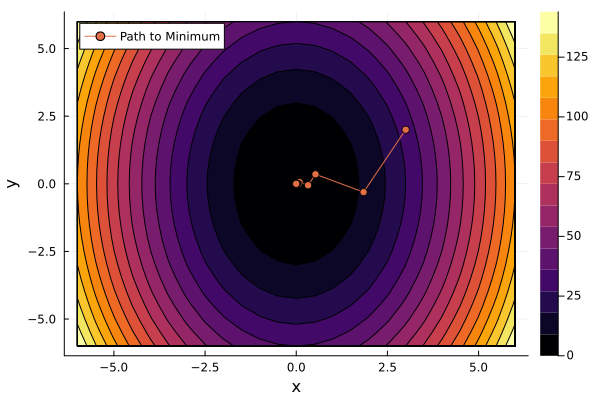

In [241]:
contourf(x_val, y_val, z_val, xlabel = "x", ylabel = "y", zlabel = "Original_Function")
plot!(x_path, y_path, markershape=:circle, aspect=:equal, label="Path to Minimum")
#Plot contour and path overlay